<a href="https://colab.research.google.com/github/william-screen/data-visualization-590/blob/master/labs/Plot_Multi_Dimensional_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 7: 1D data

Let's first import basic packages and then load a dataset from `vega_datasets` package. If you don't have `vega_datasets` or `altair` installed yet, use `pip` or `conda` to install them. 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from vega_datasets import data

In [0]:
cars = data.cars()
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


## 1D scatter plot

Let's consider the `Acceleration` column as our 1D data. If we ask pandas to plot this series, it'll produce a line graph where the index becomes the horizontal axis. 

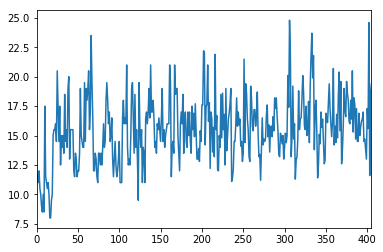

In [0]:
cars.Acceleration.plot()

It's actually not easy to use pandas to create an 1-D scatter plot. We can use `matploblib`'s `scatter` function though. 

We can first create an array with zeros. `np.zeros_like` returns an array with zeros that matches the shape of the input array. 

In [0]:
np.zeros_like([1,2,3])

print(np.zeros_like(cars.Acceleration))

**Q: now can you create an 1D scatter plot wit `matplotlib`'s scatter function? ** Make the figure wide (e.g. set `figsize=(10,2)`) and then remove the y tics. 

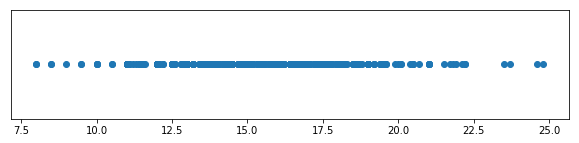

In [0]:
# TODO: put your code here

# Create Figure and Axes instances
fig, ax = plt.subplots(figsize=(10, 2))

# Plot
ax.scatter(cars.Acceleration, np.zeros_like(cars.Acceleration))

# Remove y tics
ax.set_yticks([])
ax.set_yticklabels([])

# Show
plt.show()

As you can see, there are lots of occlusions. So this plot can be misleading. Let's add some jitters. You can use `numpy`'s `random.rand()` function to generate random numbers. 

**Q: create a jittered 1D scatter plot.**

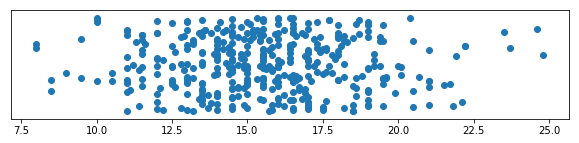

In [0]:
# TODO: put your code here
jittered_y = np.random.rand(cars.Acceleration.shape[0])

# Create Figure and Axes instances
fig, ax = plt.subplots(figsize=(10, 2))

# Plot
ax.scatter(cars.Acceleration, jittered_y)

# Remove y tics
ax.set_yticks([])
ax.set_yticklabels([])

# Show
plt.show()

We can further improve this by adding transparency to the symbols. The transparency option for `scatter` function is called `alpha`. Set it to be 0.2.

**Q: create a jittered 1D scatter plot with transparency (alpha=0.2)**

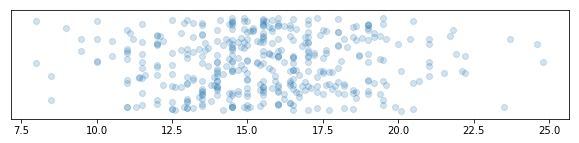

In [0]:
# TODO: put your code here
jittered_y = np.random.rand(cars.Acceleration.shape[0])

# Create Figure and Axes instances
fig, ax = plt.subplots(figsize=(10, 2))

# Plot
ax.scatter(cars.Acceleration, jittered_y, alpha=0.2)

# Remove y tics
ax.set_yticks([])
ax.set_yticklabels([])

# Show
plt.show()

Another strategy is using empty symbols. The option is `facecolors`. You can also change the stroke color (`edgecolors`). 

**Q: create a jittered 1D scatter plot with empty symbols.**

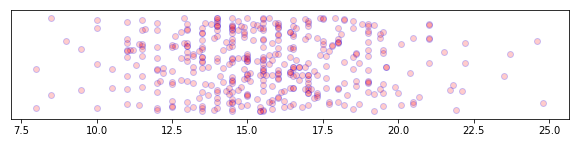

In [0]:
# TODO: put your code here
jittered_y = np.random.rand(cars.Acceleration.shape[0])

# Create Figure and Axes instances
fig, ax = plt.subplots(figsize=(10, 2))

# Plot
ax.scatter(cars.Acceleration, jittered_y, alpha=0.2, facecolors='red', edgecolors='blue')

# Remove y tics
ax.set_yticks([])
ax.set_yticklabels([])

# Show
plt.show()

## What happens with lots and lots of points?

Whatever strategy that you use, it's almost useless if you have too many data points. 

**Q: play with different number of data points and see how it looks. **

It not only becomes completely useless, it also take a while to draw the plot itself. 

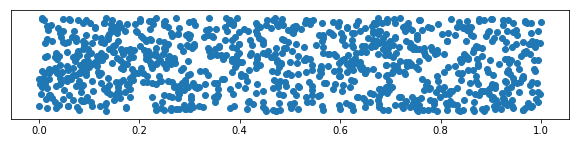

In [0]:
# TODO: play with N and see what happens. 
N = 1000
x = np.random.rand(N)
jittered_y = np.random.rand(N)

# Create Figure and Axes instances
fig, ax = plt.subplots(figsize=(10, 2))

# Plot
ax.scatter(x, jittered_y)

# Remove y tics
ax.set_yticks([])
ax.set_yticklabels([])

# Show
plt.show()

## Histogram and boxplot

When you have lots of data points, you can't no longer use the scatter plots. Even when you don't have millions of data points, you often want to get a quick summary of the distribution rather than seeing the whole dataset. For 1-D datasets, two major approaches are histogram and boxplot. Histogram is about aggregating and counting the data while boxplot is about summarizing the data. Let's first draw some histograms. 

### Histogram

It's very easy to draw a histogram with pandas. 

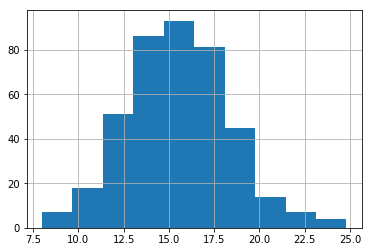

In [0]:
cars.Acceleration.hist()

You can adjust the bin size, which is the main parameter of the histogram. 

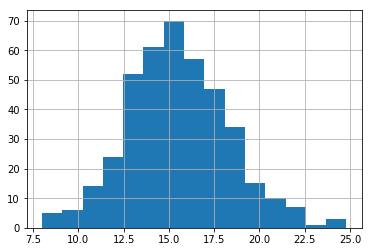

In [0]:
cars.Acceleration.hist(bins=15)

You can even specify the actual bins. 

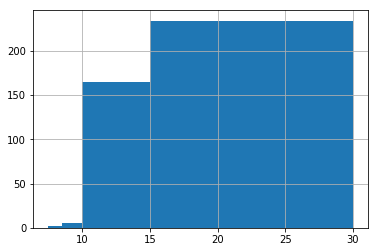

In [0]:
bins = [7.5, 8.5, 10, 15, 30]
cars.Acceleration.hist(bins=bins)

Do you see anything funky going on with this histogram? What's wrong? Can you fix it? 

**Q: Explain what's wrong with this histogram and fix it.** 

(a hint: [pandas documentation](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.hist.html) does not show the option that you should use. You should take a look at the `matplotlib`'s documentation.  

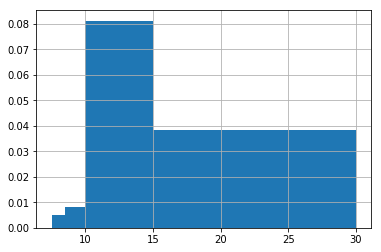

In [0]:
# TODO: put your code here
# Due to an unequal distribution of bin ranges, the histogram becomes skewed.
# To resolve, set the density attribute to True. This results in the weights being normalized, so that the integral of the density over the range remains 1.
bins = [7.5, 8.5, 10, 15, 30]
cars.Acceleration.hist(bins=bins, density=True)

### Boxplot

Boxplot can be created with pandas very easily. Check out the `plot` documentation. 

**Q: create a box plot of `Acceleration`**

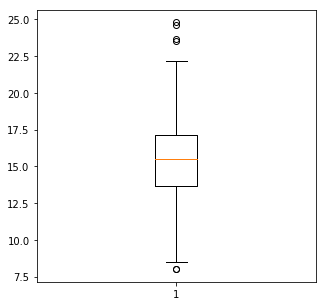

In [0]:
# TODO: put your code here.

# Create Figure and Axes instances
fig, ax = plt.subplots(figsize=(5, 5))

# Plot
ax.boxplot(cars.Acceleration)

# Show
plt.show()

## 1D scatter plot with Seaborn and Altair

As you may have noticed, it is not very easy to use `matplotlib`. The organization of plot functions and parameters are not very systematic. Whenever you draw something, you should search how to do it, what are the parameters you can tweak, etc. You need to manually tweak a lot of things when you work with `matplotlib`. 

There are more systematic approaches towards data visualization, such as the "[Grammar of Graphics](https://www.amazon.com/Grammar-Graphics-Statistics-Computing/dp/0387245448)". This idea of *grammar* led to the famous `ggplot2` (http://ggplot2.tidyverse.org) package in R as well as the [Vega & Vega-lite]((https://vega.github.io)) for the web. The grammar-based approach lets you work with *tidy data* in a natural way, and also lets you approach the data visualization systematically. In other words, they are very cool. 😎

I'd like to introduce two nice Python libraries. One is called `seaborn` (https://seaborn.pydata.org), which is focused on creating complex statistical data visualizations, and the other is called `altair` (https://altair-viz.github.io/) and it is a Python library that lets you *define* a visualization and translates it into vega-lite json. 

Seaborn would be useful when you are doing exploratory data analysis; altair may be useful if you are thinking about creating and putting an interactive visualization on the web. 

If you don't have them yet, check the installation page: (https://altair-viz.github.io/getting_started/installation.html). In conda,

    $ conda install -c conda-forge altair vega_datasets jupyterlab vega
    
Let's play with it. 

In [0]:
import seaborn as sns
import altair as alt

# uncomment the following line for Jupyter notebook
# alt.renderers.enable('notebook')
# Altair can be used directly in Google’s Colab 

In [0]:
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


### Beeswarm plots with seaborn 

Seaborn has a built-in function to create 1D scatter plots with multiple categories. 

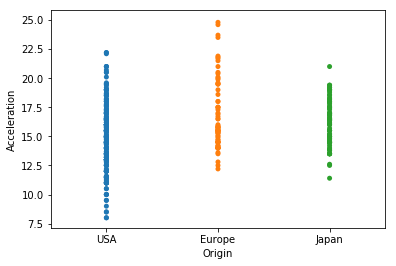

In [0]:
sns.stripplot(x='Origin', y='Acceleration', data=cars, jitter=False)

And you can easily add jitters or even create a beeswarm plot. 

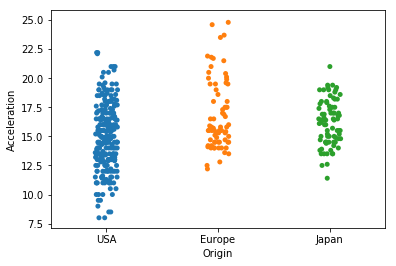

In [0]:
sns.stripplot(x='Origin', y='Acceleration', data=cars, jitter=True)

Seems like European cars tend to have good acceleration. 😎 Let's look at the beeswarm plot, which is a pretty nice option for fairly small datasets. 

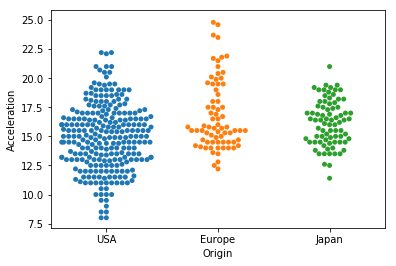

In [0]:
sns.swarmplot(x='Origin', y='Acceleration', data=cars)

Seaborn also allows you to use colors for another categorical variable. The option is `hue`.  

**Q: can you create a beeswarm plot where the swarms are grouped by `Cylinders`, y-values are `Acceleration`, and colors represent the `Origin`?**

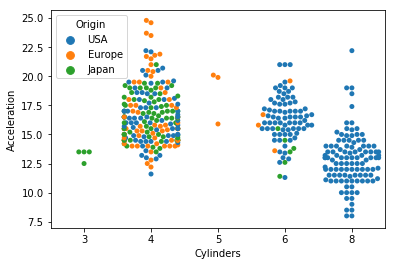

In [0]:
# TODO: put your code here
sns.swarmplot(x='Cylinders', y='Acceleration', data=cars, hue="Origin")

And of course you can create box plots too. 

**Q: Create boxplots to show the relationships between `Cylinders` and `Acceleration`. **


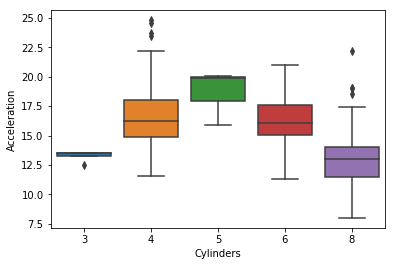

In [0]:
# TODO: put your code here
sns.boxplot(x='Cylinders', y='Acceleration', data=cars)

### Altair basics

With `altair`, you're thinking in terms of a whole dataframe, rather than vectors for x or vectors for y. Passing the dataset to `Chart` creates an empty plot. You then need to say what's the visual encoding of the data. If you try to run `alt.Chart(cars)`, it will complain. 

In [0]:
alt.Chart(cars).mark_point()

Chart({
  data:      Acceleration  Cylinders  Displacement  ...  Origin  Weight_in_lbs       Year
  0            12.0          8         307.0  ...     USA           3504 1970-01-01
  1            11.5          8         350.0  ...     USA           3693 1970-01-01
  2            11.0          8         318.0  ...     USA           3436 1970-01-01
  3            12.0          8         304.0  ...     USA           3433 1970-01-01
  4            10.5          8         302.0  ...     USA           3449 1970-01-01
  5            10.0          8         429.0  ...     USA           4341 1970-01-01
  6             9.0          8         454.0  ...     USA           4354 1970-01-01
  7             8.5          8         440.0  ...     USA           4312 1970-01-01
  8            10.0          8         455.0  ...     USA           4425 1970-01-01
  9             8.5          8         390.0  ...     USA           3850 1970-01-01
  10           17.5          4         133.0  ...  Europe           3090 1970-01-01
  11           11.5          8         350.0  ...     USA           4142 1970-01-01
  12           11.0          8         351.0  ...     USA           4034 1970-01-01
  13           10.5          8         383.0  ...     USA           4166 1970-01-01
  14           11.0          8         360.0  ...     USA           3850 1970-01-01
  15           10.0          8         383.0  ...     USA           3563 1970-01-01
  16            8.0          8         340.0  ...     USA           3609 1970-01-01
  17            8.0          8         302.0  ...     USA           3353 1970-01-01
  18            9.5          8         400.0  ...     USA           3761 1970-01-01
  19           10.0          8         455.0  ...     USA           3086 1970-01-01
  20           15.0          4         113.0  ...   Japan           2372 1970-01-01
  21           15.5          6         198.0  ...     USA           2833 1970-01-01
  22           15.5          6         199.0  ...     USA           2774 1970-01-01
  23           16.0          6         200.0  ...     USA           2587 1970-01-01
  24           14.5          4          97.0  ...   Japan           2130 1970-01-01
  25           20.5          4          97.0  ...  Europe           1835 1970-01-01
  26           17.5          4         110.0  ...  Europe           2672 1970-01-01
  27           14.5          4         107.0  ...  Europe           2430 1970-01-01
  28           17.5          4         104.0  ...  Europe           2375 1970-01-01
  29           12.5          4         121.0  ...  Europe           2234 1970-01-01
  ..            ...        ...           ...  ...     ...            ...        ...
  376          18.6          4         112.0  ...     USA           2640 1982-01-01
  377          18.0          4         112.0  ...     USA           2395 1982-01-01
  378          16.2          4         112.0  ...     USA           2575 1982-01-01
  379          16.0          4         135.0  ...     USA           2525 1982-01-01
  380          18.0          4         151.0  ...     USA           2735 1982-01-01
  381          16.4          4         140.0  ...     USA           2865 1982-01-01
  382          20.5          4         151.0  ...     USA           3035 1982-01-01
  383          15.3          4         105.0  ...  Europe           1980 1982-01-01
  384          18.2          4          91.0  ...   Japan           2025 1982-01-01
  385          17.6          4          91.0  ...   Japan           1970 1982-01-01
  386          14.7          4         105.0  ...     USA           2125 1982-01-01
  387          17.3          4          98.0  ...     USA           2125 1982-01-01
  388          14.5          4         120.0  ...   Japan           2160 1982-01-01
  389          14.5          4         107.0  ...   Japan           2205 1982-01-01
  390          16.9          4         108.0  ...   Japan           2245 1982-01-01
  391          15.0          4        

So you just see one *point*. But actually this is not a single point. This is every row of the dataset represented as a point at the same location. Because there is no specification about where to put the points, it simply draws everything on top of each other. Let's specify how to spread them across the horizontal axis. 

In [0]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
)

Chart({
  data:      Acceleration  Cylinders  Displacement  ...  Origin  Weight_in_lbs       Year
  0            12.0          8         307.0  ...     USA           3504 1970-01-01
  1            11.5          8         350.0  ...     USA           3693 1970-01-01
  2            11.0          8         318.0  ...     USA           3436 1970-01-01
  3            12.0          8         304.0  ...     USA           3433 1970-01-01
  4            10.5          8         302.0  ...     USA           3449 1970-01-01
  5            10.0          8         429.0  ...     USA           4341 1970-01-01
  6             9.0          8         454.0  ...     USA           4354 1970-01-01
  7             8.5          8         440.0  ...     USA           4312 1970-01-01
  8            10.0          8         455.0  ...     USA           4425 1970-01-01
  9             8.5          8         390.0  ...     USA           3850 1970-01-01
  10           17.5          4         133.0  ...  Europe           3090 1970-01-01
  11           11.5          8         350.0  ...     USA           4142 1970-01-01
  12           11.0          8         351.0  ...     USA           4034 1970-01-01
  13           10.5          8         383.0  ...     USA           4166 1970-01-01
  14           11.0          8         360.0  ...     USA           3850 1970-01-01
  15           10.0          8         383.0  ...     USA           3563 1970-01-01
  16            8.0          8         340.0  ...     USA           3609 1970-01-01
  17            8.0          8         302.0  ...     USA           3353 1970-01-01
  18            9.5          8         400.0  ...     USA           3761 1970-01-01
  19           10.0          8         455.0  ...     USA           3086 1970-01-01
  20           15.0          4         113.0  ...   Japan           2372 1970-01-01
  21           15.5          6         198.0  ...     USA           2833 1970-01-01
  22           15.5          6         199.0  ...     USA           2774 1970-01-01
  23           16.0          6         200.0  ...     USA           2587 1970-01-01
  24           14.5          4          97.0  ...   Japan           2130 1970-01-01
  25           20.5          4          97.0  ...  Europe           1835 1970-01-01
  26           17.5          4         110.0  ...  Europe           2672 1970-01-01
  27           14.5          4         107.0  ...  Europe           2430 1970-01-01
  28           17.5          4         104.0  ...  Europe           2375 1970-01-01
  29           12.5          4         121.0  ...  Europe           2234 1970-01-01
  ..            ...        ...           ...  ...     ...            ...        ...
  376          18.6          4         112.0  ...     USA           2640 1982-01-01
  377          18.0          4         112.0  ...     USA           2395 1982-01-01
  378          16.2          4         112.0  ...     USA           2575 1982-01-01
  379          16.0          4         135.0  ...     USA           2525 1982-01-01
  380          18.0          4         151.0  ...     USA           2735 1982-01-01
  381          16.4          4         140.0  ...     USA           2865 1982-01-01
  382          20.5          4         151.0  ...     USA           3035 1982-01-01
  383          15.3          4         105.0  ...  Europe           1980 1982-01-01
  384          18.2          4          91.0  ...   Japan           2025 1982-01-01
  385          17.6          4          91.0  ...   Japan           1970 1982-01-01
  386          14.7          4         105.0  ...     USA           2125 1982-01-01
  387          17.3          4          98.0  ...     USA           2125 1982-01-01
  388          14.5          4         120.0  ...   Japan           2160 1982-01-01
  389          14.5          4         107.0  ...   Japan           2205 1982-01-01
  390          16.9          4         108.0  ...   Japan           2245 1982-01-01
  391          15.0          4        

There is another nice mark called `tick`:

In [0]:
alt.Chart(cars).mark_tick().encode(
    x='Horsepower',
)

Chart({
  data:      Acceleration  Cylinders  Displacement  ...  Origin  Weight_in_lbs       Year
  0            12.0          8         307.0  ...     USA           3504 1970-01-01
  1            11.5          8         350.0  ...     USA           3693 1970-01-01
  2            11.0          8         318.0  ...     USA           3436 1970-01-01
  3            12.0          8         304.0  ...     USA           3433 1970-01-01
  4            10.5          8         302.0  ...     USA           3449 1970-01-01
  5            10.0          8         429.0  ...     USA           4341 1970-01-01
  6             9.0          8         454.0  ...     USA           4354 1970-01-01
  7             8.5          8         440.0  ...     USA           4312 1970-01-01
  8            10.0          8         455.0  ...     USA           4425 1970-01-01
  9             8.5          8         390.0  ...     USA           3850 1970-01-01
  10           17.5          4         133.0  ...  Europe           3090 1970-01-01
  11           11.5          8         350.0  ...     USA           4142 1970-01-01
  12           11.0          8         351.0  ...     USA           4034 1970-01-01
  13           10.5          8         383.0  ...     USA           4166 1970-01-01
  14           11.0          8         360.0  ...     USA           3850 1970-01-01
  15           10.0          8         383.0  ...     USA           3563 1970-01-01
  16            8.0          8         340.0  ...     USA           3609 1970-01-01
  17            8.0          8         302.0  ...     USA           3353 1970-01-01
  18            9.5          8         400.0  ...     USA           3761 1970-01-01
  19           10.0          8         455.0  ...     USA           3086 1970-01-01
  20           15.0          4         113.0  ...   Japan           2372 1970-01-01
  21           15.5          6         198.0  ...     USA           2833 1970-01-01
  22           15.5          6         199.0  ...     USA           2774 1970-01-01
  23           16.0          6         200.0  ...     USA           2587 1970-01-01
  24           14.5          4          97.0  ...   Japan           2130 1970-01-01
  25           20.5          4          97.0  ...  Europe           1835 1970-01-01
  26           17.5          4         110.0  ...  Europe           2672 1970-01-01
  27           14.5          4         107.0  ...  Europe           2430 1970-01-01
  28           17.5          4         104.0  ...  Europe           2375 1970-01-01
  29           12.5          4         121.0  ...  Europe           2234 1970-01-01
  ..            ...        ...           ...  ...     ...            ...        ...
  376          18.6          4         112.0  ...     USA           2640 1982-01-01
  377          18.0          4         112.0  ...     USA           2395 1982-01-01
  378          16.2          4         112.0  ...     USA           2575 1982-01-01
  379          16.0          4         135.0  ...     USA           2525 1982-01-01
  380          18.0          4         151.0  ...     USA           2735 1982-01-01
  381          16.4          4         140.0  ...     USA           2865 1982-01-01
  382          20.5          4         151.0  ...     USA           3035 1982-01-01
  383          15.3          4         105.0  ...  Europe           1980 1982-01-01
  384          18.2          4          91.0  ...   Japan           2025 1982-01-01
  385          17.6          4          91.0  ...   Japan           1970 1982-01-01
  386          14.7          4         105.0  ...     USA           2125 1982-01-01
  387          17.3          4          98.0  ...     USA           2125 1982-01-01
  388          14.5          4         120.0  ...   Japan           2160 1982-01-01
  389          14.5          4         107.0  ...   Japan           2205 1982-01-01
  390          16.9          4         108.0  ...   Japan           2245 1982-01-01
  391          15.0          4        

What if we want to change the size of the points based on the data?

In [0]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    size=alt.Size("Horsepower", 
      scale=alt.Scale(domain=[1, 1000]) # the domain specifies a range of sizes 
                 )
)

Chart({
  data:      Acceleration  Cylinders  Displacement  ...  Origin  Weight_in_lbs       Year
  0            12.0          8         307.0  ...     USA           3504 1970-01-01
  1            11.5          8         350.0  ...     USA           3693 1970-01-01
  2            11.0          8         318.0  ...     USA           3436 1970-01-01
  3            12.0          8         304.0  ...     USA           3433 1970-01-01
  4            10.5          8         302.0  ...     USA           3449 1970-01-01
  5            10.0          8         429.0  ...     USA           4341 1970-01-01
  6             9.0          8         454.0  ...     USA           4354 1970-01-01
  7             8.5          8         440.0  ...     USA           4312 1970-01-01
  8            10.0          8         455.0  ...     USA           4425 1970-01-01
  9             8.5          8         390.0  ...     USA           3850 1970-01-01
  10           17.5          4         133.0  ...  Europe           3090 1970-01-01
  11           11.5          8         350.0  ...     USA           4142 1970-01-01
  12           11.0          8         351.0  ...     USA           4034 1970-01-01
  13           10.5          8         383.0  ...     USA           4166 1970-01-01
  14           11.0          8         360.0  ...     USA           3850 1970-01-01
  15           10.0          8         383.0  ...     USA           3563 1970-01-01
  16            8.0          8         340.0  ...     USA           3609 1970-01-01
  17            8.0          8         302.0  ...     USA           3353 1970-01-01
  18            9.5          8         400.0  ...     USA           3761 1970-01-01
  19           10.0          8         455.0  ...     USA           3086 1970-01-01
  20           15.0          4         113.0  ...   Japan           2372 1970-01-01
  21           15.5          6         198.0  ...     USA           2833 1970-01-01
  22           15.5          6         199.0  ...     USA           2774 1970-01-01
  23           16.0          6         200.0  ...     USA           2587 1970-01-01
  24           14.5          4          97.0  ...   Japan           2130 1970-01-01
  25           20.5          4          97.0  ...  Europe           1835 1970-01-01
  26           17.5          4         110.0  ...  Europe           2672 1970-01-01
  27           14.5          4         107.0  ...  Europe           2430 1970-01-01
  28           17.5          4         104.0  ...  Europe           2375 1970-01-01
  29           12.5          4         121.0  ...  Europe           2234 1970-01-01
  ..            ...        ...           ...  ...     ...            ...        ...
  376          18.6          4         112.0  ...     USA           2640 1982-01-01
  377          18.0          4         112.0  ...     USA           2395 1982-01-01
  378          16.2          4         112.0  ...     USA           2575 1982-01-01
  379          16.0          4         135.0  ...     USA           2525 1982-01-01
  380          18.0          4         151.0  ...     USA           2735 1982-01-01
  381          16.4          4         140.0  ...     USA           2865 1982-01-01
  382          20.5          4         151.0  ...     USA           3035 1982-01-01
  383          15.3          4         105.0  ...  Europe           1980 1982-01-01
  384          18.2          4          91.0  ...   Japan           2025 1982-01-01
  385          17.6          4          91.0  ...   Japan           1970 1982-01-01
  386          14.7          4         105.0  ...     USA           2125 1982-01-01
  387          17.3          4          98.0  ...     USA           2125 1982-01-01
  388          14.5          4         120.0  ...   Japan           2160 1982-01-01
  389          14.5          4         107.0  ...   Japan           2205 1982-01-01
  390          16.9          4         108.0  ...   Japan           2245 1982-01-01
  391          15.0          4        

There are too many legend labels. Can we manually specify the legends?

In [0]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    size=alt.Size("Horsepower", 
      scale=alt.Scale(domain=[1, 1000]), # the domain specifies a range of sizes 
      legend=alt.Legend(values=[10, 100, 1000]) # Specify 3 legend labels
                 )
)

Chart({
  data:      Acceleration  Cylinders  Displacement  ...  Origin  Weight_in_lbs       Year
  0            12.0          8         307.0  ...     USA           3504 1970-01-01
  1            11.5          8         350.0  ...     USA           3693 1970-01-01
  2            11.0          8         318.0  ...     USA           3436 1970-01-01
  3            12.0          8         304.0  ...     USA           3433 1970-01-01
  4            10.5          8         302.0  ...     USA           3449 1970-01-01
  5            10.0          8         429.0  ...     USA           4341 1970-01-01
  6             9.0          8         454.0  ...     USA           4354 1970-01-01
  7             8.5          8         440.0  ...     USA           4312 1970-01-01
  8            10.0          8         455.0  ...     USA           4425 1970-01-01
  9             8.5          8         390.0  ...     USA           3850 1970-01-01
  10           17.5          4         133.0  ...  Europe           3090 1970-01-01
  11           11.5          8         350.0  ...     USA           4142 1970-01-01
  12           11.0          8         351.0  ...     USA           4034 1970-01-01
  13           10.5          8         383.0  ...     USA           4166 1970-01-01
  14           11.0          8         360.0  ...     USA           3850 1970-01-01
  15           10.0          8         383.0  ...     USA           3563 1970-01-01
  16            8.0          8         340.0  ...     USA           3609 1970-01-01
  17            8.0          8         302.0  ...     USA           3353 1970-01-01
  18            9.5          8         400.0  ...     USA           3761 1970-01-01
  19           10.0          8         455.0  ...     USA           3086 1970-01-01
  20           15.0          4         113.0  ...   Japan           2372 1970-01-01
  21           15.5          6         198.0  ...     USA           2833 1970-01-01
  22           15.5          6         199.0  ...     USA           2774 1970-01-01
  23           16.0          6         200.0  ...     USA           2587 1970-01-01
  24           14.5          4          97.0  ...   Japan           2130 1970-01-01
  25           20.5          4          97.0  ...  Europe           1835 1970-01-01
  26           17.5          4         110.0  ...  Europe           2672 1970-01-01
  27           14.5          4         107.0  ...  Europe           2430 1970-01-01
  28           17.5          4         104.0  ...  Europe           2375 1970-01-01
  29           12.5          4         121.0  ...  Europe           2234 1970-01-01
  ..            ...        ...           ...  ...     ...            ...        ...
  376          18.6          4         112.0  ...     USA           2640 1982-01-01
  377          18.0          4         112.0  ...     USA           2395 1982-01-01
  378          16.2          4         112.0  ...     USA           2575 1982-01-01
  379          16.0          4         135.0  ...     USA           2525 1982-01-01
  380          18.0          4         151.0  ...     USA           2735 1982-01-01
  381          16.4          4         140.0  ...     USA           2865 1982-01-01
  382          20.5          4         151.0  ...     USA           3035 1982-01-01
  383          15.3          4         105.0  ...  Europe           1980 1982-01-01
  384          18.2          4          91.0  ...   Japan           2025 1982-01-01
  385          17.6          4          91.0  ...   Japan           1970 1982-01-01
  386          14.7          4         105.0  ...     USA           2125 1982-01-01
  387          17.3          4          98.0  ...     USA           2125 1982-01-01
  388          14.5          4         120.0  ...   Japan           2160 1982-01-01
  389          14.5          4         107.0  ...   Japan           2205 1982-01-01
  390          16.9          4         108.0  ...   Japan           2245 1982-01-01
  391          15.0          4        

In `altair`, histogram is not a special type of visualization, but simple a plot with bars where a variable is binned and a counting aggregation function is used. 

In [0]:
alt.Chart(cars).mark_bar().encode(
    x=alt.X('Acceleration', bin=True),
    y='count()'
) 

Chart({
  data:      Acceleration  Cylinders  Displacement  ...  Origin  Weight_in_lbs       Year
  0            12.0          8         307.0  ...     USA           3504 1970-01-01
  1            11.5          8         350.0  ...     USA           3693 1970-01-01
  2            11.0          8         318.0  ...     USA           3436 1970-01-01
  3            12.0          8         304.0  ...     USA           3433 1970-01-01
  4            10.5          8         302.0  ...     USA           3449 1970-01-01
  5            10.0          8         429.0  ...     USA           4341 1970-01-01
  6             9.0          8         454.0  ...     USA           4354 1970-01-01
  7             8.5          8         440.0  ...     USA           4312 1970-01-01
  8            10.0          8         455.0  ...     USA           4425 1970-01-01
  9             8.5          8         390.0  ...     USA           3850 1970-01-01
  10           17.5          4         133.0  ...  Europe           3090 1970-01-01
  11           11.5          8         350.0  ...     USA           4142 1970-01-01
  12           11.0          8         351.0  ...     USA           4034 1970-01-01
  13           10.5          8         383.0  ...     USA           4166 1970-01-01
  14           11.0          8         360.0  ...     USA           3850 1970-01-01
  15           10.0          8         383.0  ...     USA           3563 1970-01-01
  16            8.0          8         340.0  ...     USA           3609 1970-01-01
  17            8.0          8         302.0  ...     USA           3353 1970-01-01
  18            9.5          8         400.0  ...     USA           3761 1970-01-01
  19           10.0          8         455.0  ...     USA           3086 1970-01-01
  20           15.0          4         113.0  ...   Japan           2372 1970-01-01
  21           15.5          6         198.0  ...     USA           2833 1970-01-01
  22           15.5          6         199.0  ...     USA           2774 1970-01-01
  23           16.0          6         200.0  ...     USA           2587 1970-01-01
  24           14.5          4          97.0  ...   Japan           2130 1970-01-01
  25           20.5          4          97.0  ...  Europe           1835 1970-01-01
  26           17.5          4         110.0  ...  Europe           2672 1970-01-01
  27           14.5          4         107.0  ...  Europe           2430 1970-01-01
  28           17.5          4         104.0  ...  Europe           2375 1970-01-01
  29           12.5          4         121.0  ...  Europe           2234 1970-01-01
  ..            ...        ...           ...  ...     ...            ...        ...
  376          18.6          4         112.0  ...     USA           2640 1982-01-01
  377          18.0          4         112.0  ...     USA           2395 1982-01-01
  378          16.2          4         112.0  ...     USA           2575 1982-01-01
  379          16.0          4         135.0  ...     USA           2525 1982-01-01
  380          18.0          4         151.0  ...     USA           2735 1982-01-01
  381          16.4          4         140.0  ...     USA           2865 1982-01-01
  382          20.5          4         151.0  ...     USA           3035 1982-01-01
  383          15.3          4         105.0  ...  Europe           1980 1982-01-01
  384          18.2          4          91.0  ...   Japan           2025 1982-01-01
  385          17.6          4          91.0  ...   Japan           1970 1982-01-01
  386          14.7          4         105.0  ...     USA           2125 1982-01-01
  387          17.3          4          98.0  ...     USA           2125 1982-01-01
  388          14.5          4         120.0  ...   Japan           2160 1982-01-01
  389          14.5          4         107.0  ...   Japan           2205 1982-01-01
  390          16.9          4         108.0  ...   Japan           2245 1982-01-01
  391          15.0          4        

**Q: can you create a 2D scatterplot with `Acceleration` and `Horsepower`? Use `Origin` for the colors and use `Horsepower` to set the size of the points. Save it to m07.html** (https://altair-viz.github.io/getting_started/starting.html#publishing-your-visualization)

In [0]:
# TODO: put your code here


alt.Chart(cars).mark_circle().encode(
    x=('Acceleration'),
    y=('Horsepower'),
    color='Origin',
    size='Horsepower'
)

Chart({
  data:      Acceleration  Cylinders  Displacement  ...  Origin  Weight_in_lbs       Year
  0            12.0          8         307.0  ...     USA           3504 1970-01-01
  1            11.5          8         350.0  ...     USA           3693 1970-01-01
  2            11.0          8         318.0  ...     USA           3436 1970-01-01
  3            12.0          8         304.0  ...     USA           3433 1970-01-01
  4            10.5          8         302.0  ...     USA           3449 1970-01-01
  5            10.0          8         429.0  ...     USA           4341 1970-01-01
  6             9.0          8         454.0  ...     USA           4354 1970-01-01
  7             8.5          8         440.0  ...     USA           4312 1970-01-01
  8            10.0          8         455.0  ...     USA           4425 1970-01-01
  9             8.5          8         390.0  ...     USA           3850 1970-01-01
  10           17.5          4         133.0  ...  Europe           3090 1970-01-01
  11           11.5          8         350.0  ...     USA           4142 1970-01-01
  12           11.0          8         351.0  ...     USA           4034 1970-01-01
  13           10.5          8         383.0  ...     USA           4166 1970-01-01
  14           11.0          8         360.0  ...     USA           3850 1970-01-01
  15           10.0          8         383.0  ...     USA           3563 1970-01-01
  16            8.0          8         340.0  ...     USA           3609 1970-01-01
  17            8.0          8         302.0  ...     USA           3353 1970-01-01
  18            9.5          8         400.0  ...     USA           3761 1970-01-01
  19           10.0          8         455.0  ...     USA           3086 1970-01-01
  20           15.0          4         113.0  ...   Japan           2372 1970-01-01
  21           15.5          6         198.0  ...     USA           2833 1970-01-01
  22           15.5          6         199.0  ...     USA           2774 1970-01-01
  23           16.0          6         200.0  ...     USA           2587 1970-01-01
  24           14.5          4          97.0  ...   Japan           2130 1970-01-01
  25           20.5          4          97.0  ...  Europe           1835 1970-01-01
  26           17.5          4         110.0  ...  Europe           2672 1970-01-01
  27           14.5          4         107.0  ...  Europe           2430 1970-01-01
  28           17.5          4         104.0  ...  Europe           2375 1970-01-01
  29           12.5          4         121.0  ...  Europe           2234 1970-01-01
  ..            ...        ...           ...  ...     ...            ...        ...
  376          18.6          4         112.0  ...     USA           2640 1982-01-01
  377          18.0          4         112.0  ...     USA           2395 1982-01-01
  378          16.2          4         112.0  ...     USA           2575 1982-01-01
  379          16.0          4         135.0  ...     USA           2525 1982-01-01
  380          18.0          4         151.0  ...     USA           2735 1982-01-01
  381          16.4          4         140.0  ...     USA           2865 1982-01-01
  382          20.5          4         151.0  ...     USA           3035 1982-01-01
  383          15.3          4         105.0  ...  Europe           1980 1982-01-01
  384          18.2          4          91.0  ...   Japan           2025 1982-01-01
  385          17.6          4          91.0  ...   Japan           1970 1982-01-01
  386          14.7          4         105.0  ...     USA           2125 1982-01-01
  387          17.3          4          98.0  ...     USA           2125 1982-01-01
  388          14.5          4         120.0  ...   Japan           2160 1982-01-01
  389          14.5          4         107.0  ...   Japan           2205 1982-01-01
  390          16.9          4         108.0  ...   Japan           2245 1982-01-01
  391          15.0          4        

In [0]:
alt.Chart(cars).mark_circle().encode(
    x=('Acceleration'),
    y=('Horsepower'),
    color='Origin',
    size='Horsepower'
).save('m07.html')

With `altair`, you're thinking in terms of a whole dataframe, rather than vectors for x or vectors for y. Passing the dataset to `Chart` creates an empty plot. You then need to say what's the visual encoding of the data. If you try to run `alt.Chart(cars)`, it will complain. 